In [1]:
import json
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display, Image
import os
from tqdm import tqdm
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
#from pymatgen.electronic_structure import plotter
#from pymatgen.electronic_structure import bandstructure as bs
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure
from math import pi, fabs

with MPRester("XLgeaWrG6lipMAIH") as mpr:

    structure = mpr.get_structure_by_material_id("mp-924128") 
    phonons   = mpr.get_phonon_bandstructure_by_material_id("mp-924128") 

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# Télécharger la structure de bande de phonons

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

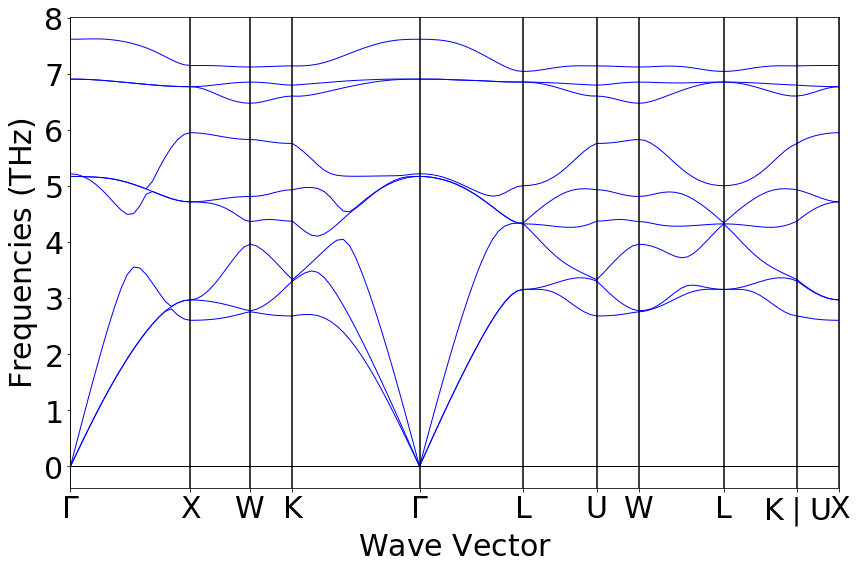

In [2]:
ph_plot = plotter.PhononBSPlotter(phonons)
ph_plot.get_plot()

# Identifier la zone de Brillouin

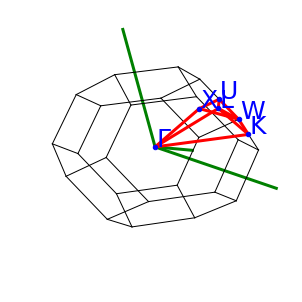

In [3]:
ph_plot.plot_brillouin() 

# Calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

In [4]:
data = ph_plot.bs_plot_data()
distances   = data.get("distances")
frequencies = data.get("frequency")
directions  = data.get('ticks').get('label')

zone    = []
branch  = []
freq    = []

for i in range(len(frequencies)):
    for j in range(len(frequencies[i])):
        if i not in zone and j not in branch and frequencies[i][j][0] == 0 :
            zone.append(i)
            branch.append(j)
            freq.append(frequencies[i][j])
        elif i not in zone and j not in branch and frequencies[i][j][-1] == 0 :
            zone.append(i)
            branch.append(j)
            freq.append(frequencies[i][j])
            
print("Branches :", branch)
print("Zones : ", zone)
print("Frequences : ", freq)

Branches : [0, 1, 2]
Zones :  [0, 3, 4]
Frequences :  [[0.0, 0.2355068266824959, 0.4689441409884131, 0.6983110334929697, 0.9218159148583492, 1.1380791884180212, 1.346246854252116, 1.5458745096680628, 1.7366516993567007, 1.9181690801395934, 2.089837799245979, 2.250904756745954, 2.400436097635507, 2.5372031476754833, 2.659529310062787, 2.7652204357612717, 2.8092557763876225, 2.6998116470946267, 2.6296723339959507, 2.605482776651004], [3.305972919022884, 3.385429190756121, 3.4524988088476762, 3.486610750911463, 3.46124648805952, 3.3694743125605835, 3.2295314582224877, 3.0596228975366544, 2.8699856906651546, 2.6660624738119476, 2.4511053192362353, 2.227337388039805, 1.9964007128574224, 1.7595271374743964, 1.5176405484137476, 1.2714689440262297, 1.0216637331804728, 0.7688887431847944, 0.5138540816846376, 0.25730536272626314, 0.0], [0.0, 0.4033425980133432, 0.8041589033286884, 1.1999363727391557, 1.5881724171290672, 1.9663404346505158, 2.331821774886865, 2.6818069635751103, 3.013158002120077

In [5]:
# 3 distances
d1 = distances[zone[0]]
d2 = distances[zone[1]]
d3 = distances[zone[2]]

# Frequencies for those distances
freq1 = freq[0]
freq2 = freq[1]
freq3 = freq[2]
    
# Slope for first branch
x1 = np.array([d1[0],d1[1]])
y1 = np.array([freq1[0],freq1[1]])
coef1 = np.polyfit(x1,y1,1)

# Slope for second branch
x2 = np.array([d2[-1],d2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
coef2 = np.polyfit(x2,y2,1)

# Slope for thrid branch
x3 = np.array([d3[0],d3[1]])
y3 = np.array([freq3[0],freq3[1]])
coef3 = np.polyfit(x3,y3,1)

# Corrective Factor
# 1 Angstrom = 10^{-10} m
# 1 THz = 10^{12} Hz
fact = 10**(-10) * 10**(12)

print("La vitesse du son de la branche acoustique", branch[0]+1, "selon la direction \u0393 - X est de ", 2*pi*fabs(coef1[0])*fact, "[m/s].")
print("La vitesse du son de la branche acoustique", branch[1]+1, "selon la direction K - \u0393 est de ", 2*pi*fabs(coef2[0])*fact, "[m/s].")
print("La vitesse du son de la branche acoustique", branch[2]+1, "selon la direction \u0393 - L est de ", 2*pi*fabs(coef3[0])*fact, "[m/s].")

La vitesse du son de la branche acoustique 1 selon la direction Γ - X est de  2707.6193878771433 [m/s].
La vitesse du son de la branche acoustique 2 selon la direction K - Γ est de  2935.8447492854702 [m/s].
La vitesse du son de la branche acoustique 3 selon la direction Γ - L est de  4790.963858061009 [m/s].
